## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [41]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [42]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [43]:
df.shape
df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

**Challenge**: Count the number of entries in each column of the dataframe

In [44]:
df.count()

DATE     2524
TAG      2524
POSTS    2524
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [45]:
df.groupby('TAG').sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_15760\1363437105.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('TAG').sum()


,POSTS
TAG,
assembly,43316
c,399457
c#,1602055
c++,799087
delphi,51268
go,70874
java,1905860
javascript,2510463
perl,67860


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [46]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,182,182
c,182,182
c#,183,183
c++,182,182
delphi,182,182
go,167,167
java,182,182
javascript,182,182
perl,182,182


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [47]:
print(df['DATE'][1])
type(df['DATE'][1])

2008-08-01 00:00:00


str

In [54]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [55]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [56]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [57]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [58]:
reshaped_df.shape

(183, 14)

In [59]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1640.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,955.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [60]:
reshaped_df.count()

TAG
assembly      182
c             182
c#            183
c++           182
delphi        182
go            167
java          182
javascript    182
perl          182
php           182
python        182
r             180
ruby          182
swift         174
dtype: int64

In [61]:
# replaces NaN with 0
# inplace=True means that the changes are saved to the df right away
reshaped_df.fillna(0, inplace=True)

In [62]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1640.0,755.0,104.0,0.0,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,955.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0


In [63]:
# to check if there are any NaN values
reshaped_df.isna().values.any() 

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

(13879.0, 19205.0)

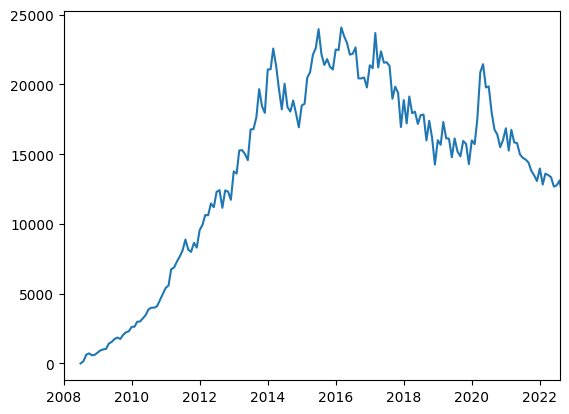

In [87]:
plt.plot(reshaped_df.index, reshaped_df['javascript'])
plt.xlim([pd.to_datetime('2008'), pd.to_datetime('2022-08-01')])


.figure() - allows us to resize our chart

.xticks() - configures our x-axis

.yticks() - configures our y-axis

.xlabel() - add text to the x-axis

.ylabel() - add text to the y-axis

.ylim() - allows us to set a lower and upper bound

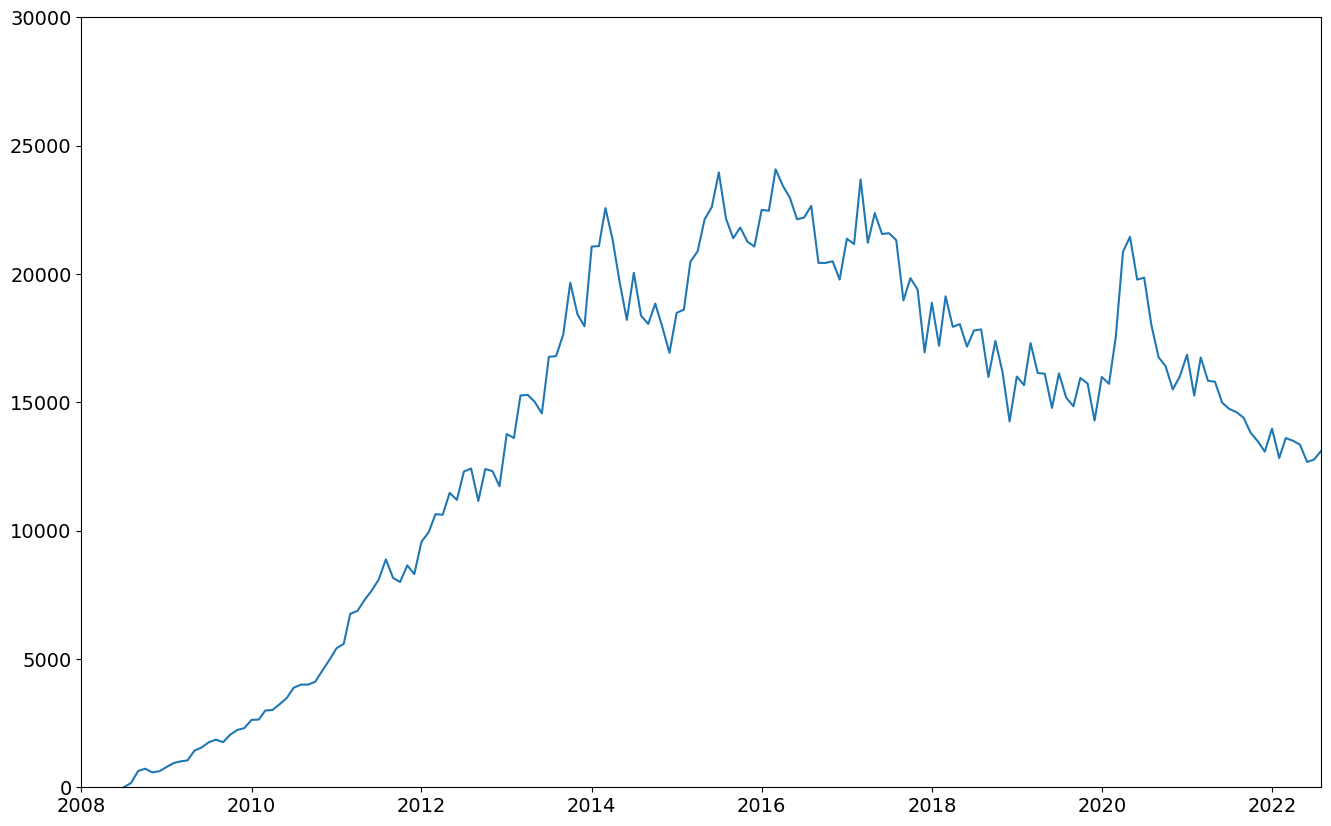

In [93]:
plt.figure(figsize=(16,10))  # width:16, height:10
plt.xticks(fontsize=(14))    # x-axis font size
plt.yticks(fontsize=(14))    # y-axis font size
plt.xlim([pd.to_datetime('2008'), pd.to_datetime('2022-08-01')])  # x-axis range
plt.ylim([0, 30000])         # y-axis range
plt.plot(reshaped_df.index, reshaped_df['javascript'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

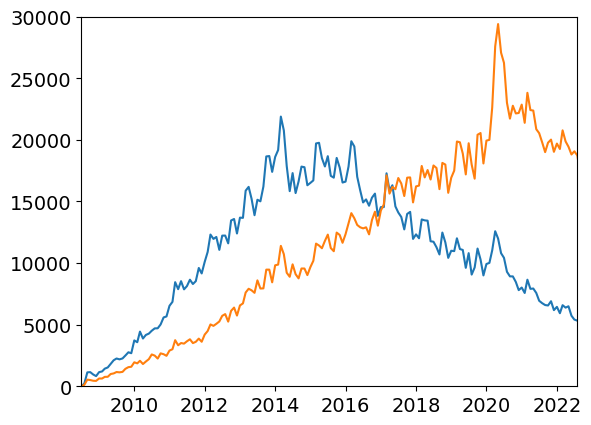

In [100]:
plt.figure(figsize=(16,10))  # width:16, height:10
plt.xticks(fontsize=(14))    # x-axis font size
plt.yticks(fontsize=(14))    # y-axis font size
plt.xlim([pd.to_datetime('2008-07-01'), pd.to_datetime('2022-08-01')])  # x-axis range
plt.ylim([0, 30000])         # y-axis range
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.plot(reshaped_df.index, reshaped_df['python'])

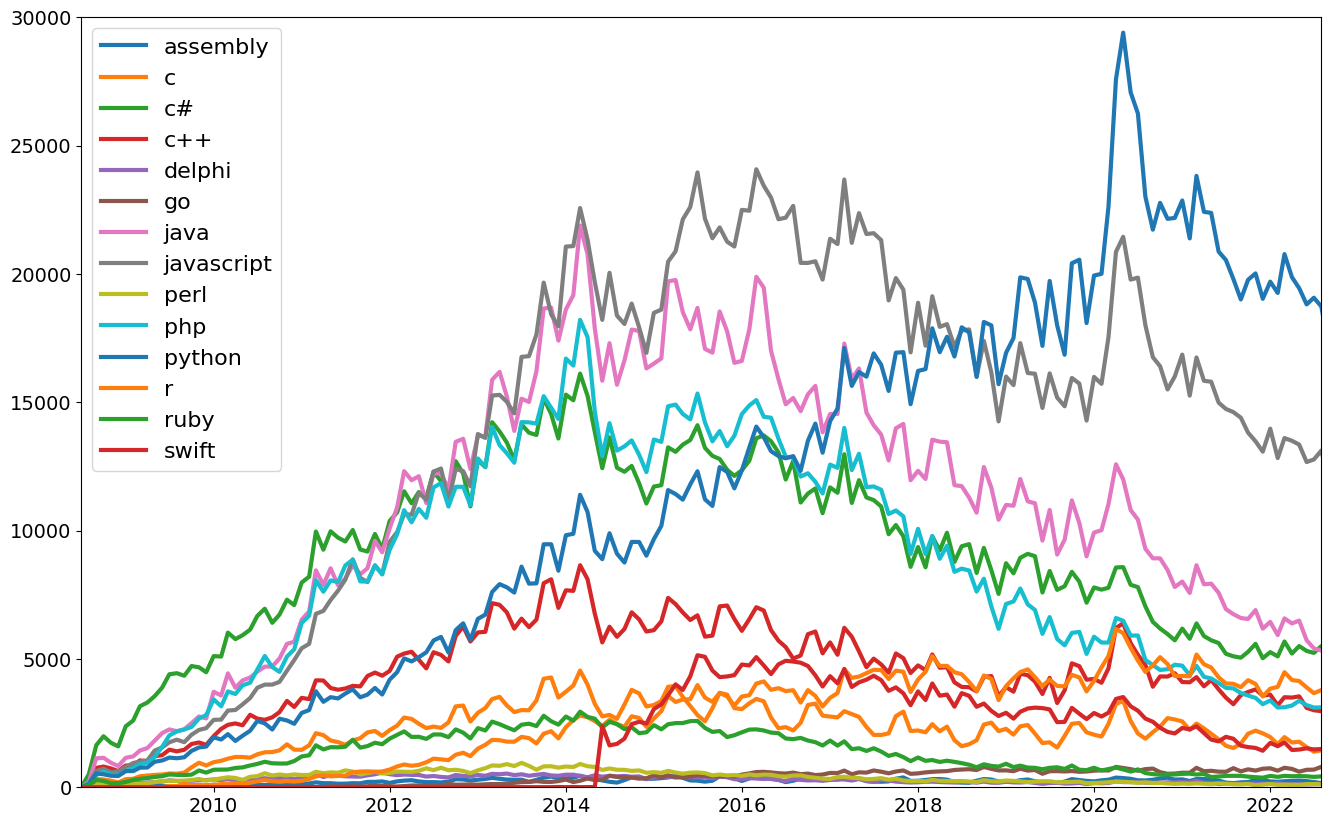

In [106]:
plt.figure(figsize=(16,10))  # width:16, height:10
plt.xticks(fontsize=(14))    # x-axis font size
plt.yticks(fontsize=(14))    # y-axis font size
plt.xlim([pd.to_datetime('2008-07-01'), pd.to_datetime('2022-08-01')])  # x-axis range
plt.ylim([0, 30000])         # y-axis range

# plt.plot(reshaped_df.index, reshaped_df['java'], label='Java')
# plt.plot(reshaped_df.index, reshaped_df['python'], label='Python')
# plt.plot(reshaped_df.index, reshaped_df['javascript'], label='JavaScript')
# plt.plot(reshaped_df.index, reshaped_df['c#'], label='C#')
# plt.plot(reshaped_df.index, reshaped_df['php'], label='PHP')
# plt.plot(reshaped_df.index, reshaped_df['c++'], label='C++')
# plt.plot(reshaped_df.index, reshaped_df['ruby'], label='Ruby')
# plt.plot(reshaped_df.index, reshaped_df['swift'], label='Swift')
# plt.plot(reshaped_df.index, reshaped_df['c'], label='C')
# plt.plot(reshaped_df.index, reshaped_df['r'], label='R')
# plt.plot(reshaped_df.index, reshaped_df['assembly'], label='Assembly')
# plt.plot(reshaped_df.index, reshaped_df['go'], label='Go')
# plt.plot(reshaped_df.index, reshaped_df['delphi'], label='Delphi')
# plt.plot(reshaped_df.index, reshaped_df['perl'], label='Perl')

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=column)
plt.legend(fontsize=(16))   # legend font size


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

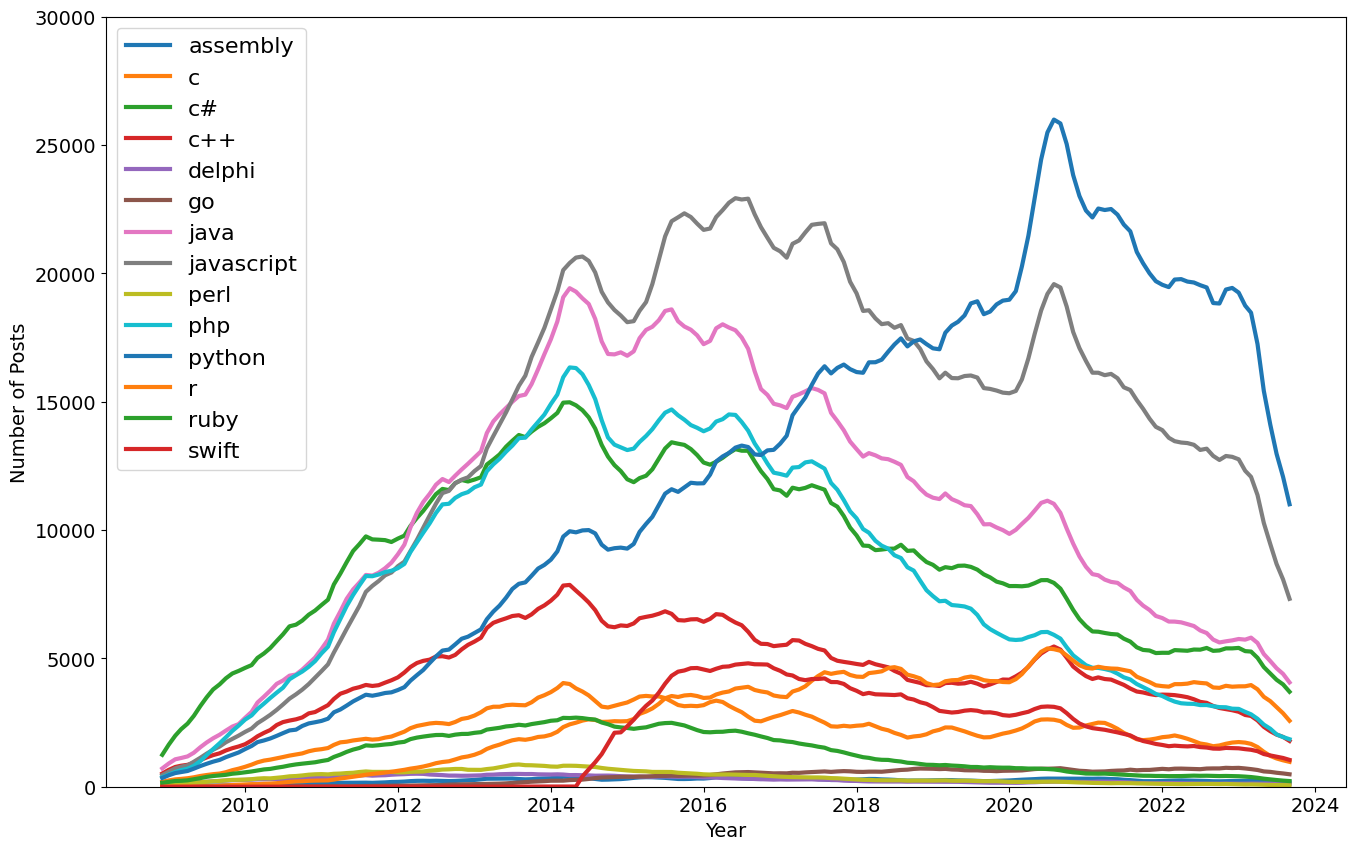

In [123]:
roll_df = reshaped_df.rolling(window=6).mean()  # window size: 6 months (number of months to average over)

plt.figure(figsize=(16,10))  # width:16, height:10 
plt.xticks(fontsize=(14))    # x-axis font size
plt.yticks(fontsize=(14))    # y-axis font size
plt.xlabel('Year', fontsize=(14))  # x-axis label
plt.ylabel('Number of Posts', fontsize=(14)) # y-axis label
# plt.xlim([pd.to_datetime('2008-12-01'), pd.to_datetime('2023-09-01')])  # x-axis range
plt.ylim([0, 30000])         # y-axis range

# plot the roll_df
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=column)
plt.legend(fontsize=(16))   # legend font size

Learning Points & Summary

used .groupby() to explore the number of posts and entries per programming language

converted strings to Datetime objects with to_datetime() for easier plotting

reshaped our DataFrame by converting categories to columns using .pivot()

used .count() and isna().values.any() to look for NaN values in our DataFrame, which we then replaced using .fillna()

created (multiple) line charts using .plot() with a for-loop

styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

added a legend to tell apart which line is which by colour

smoothed out our time-series observations with .rolling().mean() and plotted them to better identify trends over time.

